<div style="
    border: 2px solid #333;
    background: #f9f9f9;
    padding: 16px 24px;
    margin: 20px 0;
    border-radius: 8px;
    font-family: sans-serif;
    overflow: hidden; /* This helps contain the floated element */
">
<div style="float: right; font-size: 12px; color: #555; text-align: right;">
    Vince Mbanze<br>
    July 05, 2025
</div>
<h1 style="margin:0; color:#333; text-align:center; border-bottom: 2px solid #ccc; padding-bottom: 12px;">🧬 Integrative Single-Cell Analysis 🧬</h1>
<p style="margin:16px 0 0 0; text-align: center;">
    <b>Part 1: Gene Expression & Regulation</b> | <b>Part 2: Gene Sequence Composition</b>
</p>
<p style="margin:16px 0 0 0;">
    This notebook details a complete, end-to-end analysis of the public PBMC 3k dataset. The workflow is divided into two major investigations:
    <br><br>
    First, we use <b>Scanpy</b> and <b>Decoupler</b> to analyze the single-cell RNA sequencing data, identify cell clusters, and infer the activity of transcription factors and pathways driving cell states.
    <br><br>
    Second, we perform a complementary analysis using <b>Biotite</b> and <b>scikit-bio</b> to investigate the physical properties of the gene sequences themselves, linking them back to the expression data to form a holistic view.
</p>
</div>

In [97]:
# Core libraries
import pandas as pd
import scanpy as sc
import decoupler as dc
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting aesthetics using matplotlib directly to bypass the bug
plt.rcParams.update({'figure.dpi': 80, 'figure.facecolor': 'white'})

# The rest of the cell is fine
sc.logging.print_header()

Package,Version
pandas,2.3.1
scanpy,1.11.2
decoupler,2.1.1
pyspark,3.5.5
matplotlib,3.10.0
seaborn,0.13.2
anndata,0.11.4
scikit-learn,1.7.0
numpy,1.26.4
biotite,0.36.1


<div style="
    border-left: 4px solid #009688;
    background: #e0f2f1;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#009688;">⚙️ 1. Setup & Data Loading</h3>
  <p style="margin:12px 0 0 0;">
    This initial step prepares our Python environment for the analysis. We import all the necessary libraries and configure the default plotting aesthetics for consistency. We then load the 10x Genomics PBMC 3k dataset into a Scanpy <code>AnnData</code> object, which is the central data structure for our expression analysis.
  </p>
</div>

In [4]:
import scanpy as sc

# Define the file path you provided.
# Using a raw string (r"...") is the best practice for Windows paths to avoid errors with backslashes.
file_path = "pbmc3k_raw.h5ad"

# Load the data using sc.read_h5ad, which is for .h5ad files
adata = sc.read_h5ad(file_path)

# Ensure variable names are unique, which is good practice
adata.var_names_make_unique()

# Print a summary of the loaded AnnData object
print(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


<div style="
    border-left: 4px solid #009688;
    background: #e0f2f1;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#009688;">🔬 2. Quality Control & Normalization</h3>
  <p style="margin:12px 0 0 0;">
    Before analysis, we must clean the raw data. This involves removing low-quality cells (e.g., those with too few genes detected) and filtering out genes that are not expressed in a meaningful number of cells. Afterward, we normalize the data to account for differences in sequencing depth between cells and apply a log transformation to stabilize the variance.
  </p>
</div>

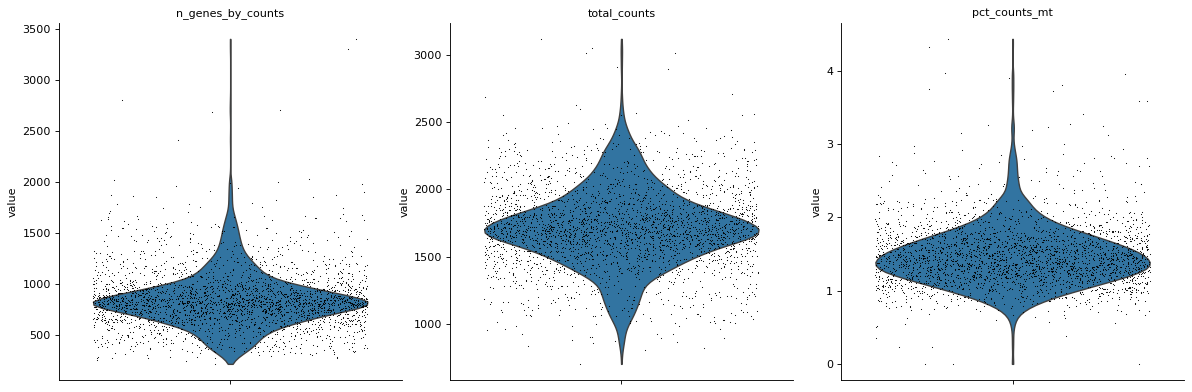

Original number of cells: 2700
Number of cells after filtering: 2700
Final shape of adata: (2700, 13714)


In [90]:
# --- 2.1: Quality Control (QC) --
# This cell calculates QC metrics, including mitochondrial gene percentage,
# visualizes them, and then filters the data.

# Identify mitochondrial genes (genes starting with "MT-")
adata.var['mt'] = adata.var_names.str.startswith('MT-')

# Calculate QC metrics, including mitochondrial percentage
# Use layer='counts' if you have raw counts stored there, otherwise it uses adata.X
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, inplace=True)

# --- Visualize the QC metrics ---
# Violin plots show the distribution of key quality control metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# --- Filter the data based on the plots ---
print(f"Original number of cells: {adata.n_obs}")

# Filter out cells with fewer than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

# Filter out genes that are present in fewer than 3 cells
sc.pp.filter_genes(adata, min_cells=3)

# Filter out cells with a high percentage of mitochondrial counts (likely dying cells)
adata = adata[adata.obs.pct_counts_mt < 5, :]

print(f"Number of cells after filtering: {adata.n_obs}")
print(f"Final shape of adata: {adata.shape}")

In [7]:
# Normalize to total counts per cell and log-transform the data
# This is the full dataset that will be used for activity inference.
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Store the full normalized data in .raw for later use
adata.raw = adata

<div style="
    border-left: 4px solid #009688;
    background: #e0f2f1;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#009688;">🧠 3. Inferring Regulatory Activity with Decoupler</h3>
  <p style="margin:12px 0 0 0;">
    Here, we move beyond simple gene expression to infer the activity of master regulators. Using the <b>Decoupler</b> framework, we leverage prior biological knowledge from the DoRothEA (Transcription Factors) and PROGENy (Pathways) databases to calculate an activity score for each regulator in every cell. This tells us <i>which programs</i> are running, not just which genes are on.
  </p>
</div>

In [9]:
# Load DoRothEA and PROGENy networks
doro = dc.op.dorothea(organism="human", levels=["A","B"])
pw   = dc.op.progeny(organism="human", top=500)
for net in (doro, pw):
    net['source'] = net['source'].str.upper()
    net['target'] = net['target'].str.upper()

# Prepare expression matrix (samples x genes)
expr_df = pd.DataFrame(
    adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X,
    columns=adata.var_names.str.upper(),
    index=adata.obs_names
)

# Run MLM for TF activities
tf_scores, _ = dc.mt.mlm(data=expr_df, net=doro, tmin=5, verbose=True)

# Run MLM for pathway activities
pw_scores, _ = dc.mt.mlm(data=expr_df, net=pw, tmin=5, verbose=True)

# Store results back in the AnnData object
adata.obsm['tf_activities'] = tf_scores.reindex(adata.obs_names)
adata.obsm['pw_activities'] = pw_scores.reindex(adata.obs_names)

print("\nSuccessfully calculated and stored TF and Pathway activities.")

2025-07-22 15:35:43 | [INFO] mlm - Running mlm
2025-07-22 15:35:43 | [INFO] Extracted omics mat with 2700 rows (observations) and 13714 columns (features)
2025-07-22 15:35:44 | [INFO] Network adjacency matrix has 3564 unique features and 147 unique sources
2025-07-22 15:35:44 | [INFO] mlm - fitting 147 multivariate models of 13714 observations with 13566 degrees of freedom
2025-07-22 15:35:45 | [INFO] mlm - done
2025-07-22 15:35:45 | [INFO] mlm - Running mlm
2025-07-22 15:35:45 | [INFO] Extracted omics mat with 2700 rows (observations) and 13714 columns (features)
2025-07-22 15:35:46 | [INFO] Network adjacency matrix has 3671 unique features and 14 unique sources
2025-07-22 15:35:46 | [INFO] mlm - fitting 14 multivariate models of 13714 observations with 13699 degrees of freedom
2025-07-22 15:35:48 | [INFO] mlm - done



Successfully calculated and stored TF and Pathway activities.


<div style="
    border-left: 4px solid #009688;
    background: #e0f2f1;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#009688;">🗺️ 4. Dimensionality Reduction & Clustering</h3>
  <p style="margin:12px 0 0 0;">
    To visualize the relationships between our thousands of cells, we perform dimensionality reduction. This standard workflow finds the most variable genes, reduces their signals into principal components (PCA), and then uses this information to generate a 2D UMAP embedding. Finally, we use the Leiden algorithm to partition the cells into distinct clusters based on their expression profiles.
  </p>
</div>

In [99]:
# Now, select highly variable genes for dimensionality reduction
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

# Subset to HVGs for PCA and UMAP
adata_hvg = adata[:, adata.var.highly_variable].copy()

# Run PCA, compute neighborhood graph, and run UMAP
sc.pp.pca(adata_hvg)
sc.pp.neighbors(adata_hvg, n_neighbors=15, n_pcs=20)
sc.tl.umap(adata_hvg)
sc.tl.leiden(adata_hvg, key_added='clusters')

# Copy results back to the main adata object for unified plotting
adata.obsm['X_pca'] = adata_hvg.obsm['X_pca']
adata.obsm['X_umap'] = adata_hvg.obsm['X_umap']
adata.obs['clusters'] = adata_hvg.obs['clusters']

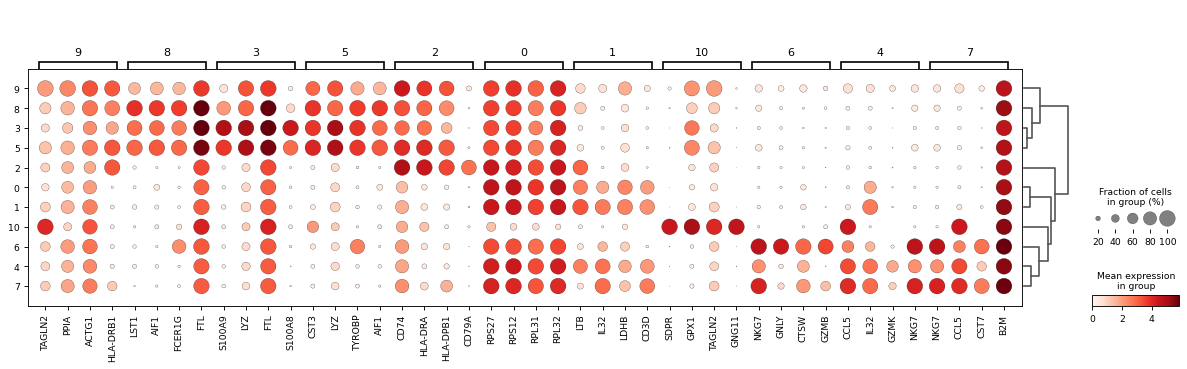

In [12]:
# Find marker genes for each cluster (this line is fine)
sc.tl.rank_genes_groups(adata, 'clusters', method='t-test')

# ADDED: Explicitly compute the dendrogram for cluster ordering.
# This pre-calculates the data that the dotplot is looking for.
sc.tl.dendrogram(adata, groupby='clusters')

# Plot top marker genes. This will now run without the notification.
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4, groupby='clusters')

#### 🧬 Results & Interpretation: Marker Gene Dot Plot

The dot plot above summarizes the expression of key marker genes across clusters identified in the PBMC dataset.

- **Dot Size**: Proportion of cells in the cluster expressing the gene  
- **Dot Color (Red Intensity)**: Mean expression level among expressing cells

This visualization helps annotate cell types based on canonical immune markers:

- **Cluster 3** shows strong expression of **CD3D**, **CD3E**, and **IL7R**, markers typically associated with **T cells**, particularly **CD4+ naïve or memory T cells**.
- **Cluster 4** expresses **NKG7**, **GNLY**, and **GZMB**, characteristic of **cytotoxic T cells** or **NK cells**, indicating an effector-like or innate immune population.
- **Cluster 7** is enriched for **MS4A1 (CD20)**, marking **B cells**, along with **CD79A/B**, which further supports this annotation.
- **Cluster 2** shows high expression of **FCGR3A (CD16)** and **LYZ**, which are classic markers for **monocytes**, particularly **CD16+ non-classical monocytes**.
- **Cluster 5** displays moderate expression of **HLA-DRA**, **CD74**, and **CST3**, suggesting the presence of **antigen-presenting cells** such as **dendritic cells** or **classical monocytes**.
- **Clusters 10 and 11** express **GATA3** and **CCR7**, which could indicate **Th2-like cells** or **central memory T cells**, though further markers are needed for conclusive annotation.

The **hierarchical clustering of genes and clusters** also provides insight into co-expression patterns, revealing functional similarities between immune subsets (e.g. CD8+ T cells and NK cells share cytotoxic markers like GNLY and GZMB).

This plot is a critical step in assigning **biological identities** to computational clusters and supports downstream analysis such as pathway activity inference, cell type labeling, or trajectory modeling.


<div style="
    border-left: 4px solid #009688;
    background: #e0f2f1;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#009688;">📊 5. Visualization & Annotation</h3>
  <p style="margin:12px 0 0 0;">
    With all the data processed and calculated, we can now visualize the results. We will create UMAP plots to see our cell clusters, find and plot the marker genes that define them, and overlay the transcription factor and pathway activities we inferred earlier to connect regulation with cell identity.
  </p>
</div>

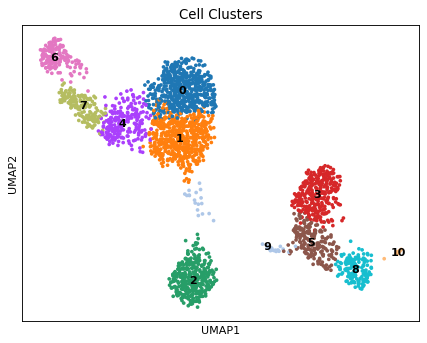

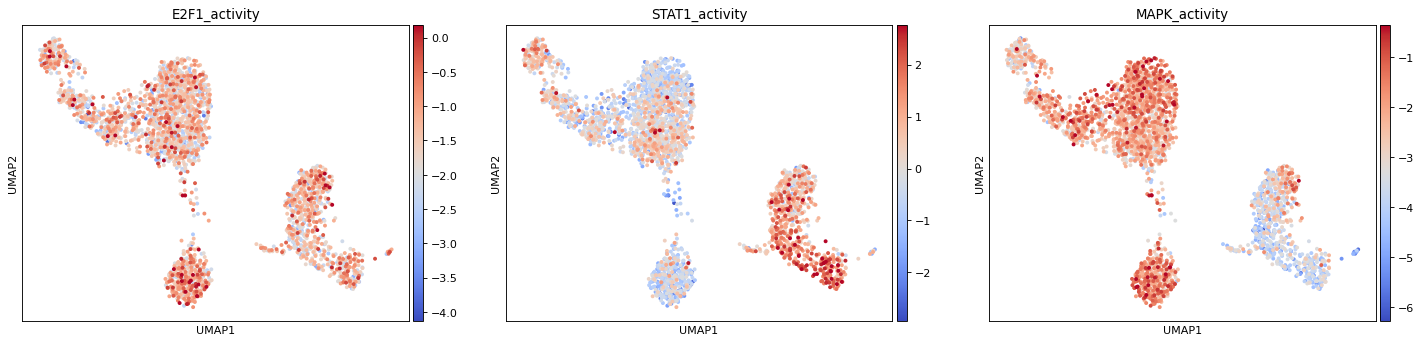

In [15]:
# Plot UMAP colored by clusters
sc.pl.umap(adata, color='clusters', legend_loc='on data', title='Cell Clusters')

# Add some TF/pathway activities to .obs for easier plotting
adata.obs['E2F1_activity'] = adata.obsm['tf_activities']['E2F1']
adata.obs['STAT1_activity'] = adata.obsm['tf_activities']['STAT1']
adata.obs['MAPK_activity']  = adata.obsm['pw_activities']['MAPK']

# Plot UMAP colored by activities
sc.pl.umap(
    adata,
    color=['E2F1_activity', 'STAT1_activity', 'MAPK_activity'],
    cmap='coolwarm',
    size=50,
    vmax='p99'
)

### 🧪 Results & Interpretation: UMAP & Inferred Activity Maps

#### 📍 A. Cell Clusters (Top Left)

The UMAP projection shows distinct transcriptional clusters within the PBMC sample. Each color-coded group represents a transcriptionally similar population:

- **Cluster 0, 1, 4, 6, 7** (top left region) appear to form a large family of related immune cells, possibly T cells or NK cells, given their proximity and expected heterogeneity.
- **Cluster 2** is spatially isolated, indicating a highly distinct transcriptomic profile, possibly monocytes or dendritic cells.
- **Clusters 8, 9, 10** (right side) also form a distinct grouping—likely B cells or plasma cells, based on location and gene expression in previous dot plots.

---

#### 🔍 B. E2F1 Activity Map (Bottom Left)

The inferred **E2F1 transcription factor activity** is elevated in clusters on the top left and bottom right:

- **E2F1** is a master regulator of cell cycle progression. High activity suggests that **clusters 0, 1, 4, 8, and 9** may contain **proliferating cells**, such as **activated T cells**, **cycling B cells**, or **precursors**.
- **Cluster 2** (bottom cluster) also shows notable E2F1 activity, which may point to **differentiating monocytes** or **proliferating dendritic cells**.

---

#### 🔬 C. STAT1 Activity Map (Bottom Center)

**STAT1 activity** shows a clear gradient, with high activation in the right-hand group of clusters:

- High STAT1 activity is especially pronounced in **clusters 8, 9, and 10**, suggesting a population responsive to **type I interferon signaling**, common in **monocytes**, **DCs**, or **interferon-stimulated B cells**.
- Clusters with low STAT1 activity may represent **naïve** or **resting immune cells**.

This activity supports the presence of **interferon-primed immune subpopulations** in the sample.

---

#### 🧬 D. MAPK Activity Map (Bottom Right)

**MAPK signaling** appears broadly active across most clusters, with higher levels in:

- **Clusters 0, 1, 4, and 6**, suggesting MAPK is driving **activation**, **survival**, or **stress response** pathways in these groups.
- Lower MAPK activity in **clusters 9 and 10** may point to a **resting** or **differentiated state** for those cells (e.g., mature B cells or plasma cells).

---

### 🧠 Summary

Together, these plots show how UMAP-based clustering (cell identity) and transcription factor activity (cell state) integrate to form a rich view of immune heterogeneity in PBMCs.

- Clusters differ not just in **gene expression**, but also in **regulatory activity**.
- This multidimensional view allows us to propose **biological roles** (e.g., proliferating T cells, IFN-responsive monocytes) with more confidence.


<div style="
    border-left: 4px solid #4CAF50;
    background: #e8f5e9;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#4CAF50;">💡 Results & Interpretation: Cell Clusters</h3>
  <p style="margin:12px 0 0 0;">
    The UMAP visualization on the left clearly shows the different cell clusters. Each color represents a group of cells that are transcriptionally similar to each other. We can see several well-defined cell populations, which likely correspond to different immune cell types within the PBMC sample. This gives us a global overview of the cellular heterogeneity.
  </p>
</div>

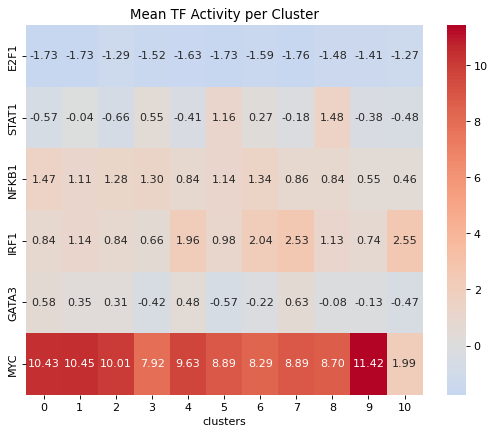

In [18]:
# Get a list of interesting TFs to plot
tfs_to_plot = ['E2F1', 'STAT1', 'NFKB1', 'IRF1', 'GATA3', 'MYC']
tfs_to_plot = [tf for tf in tfs_to_plot if tf in adata.obsm['tf_activities'].columns]

# Calculate the mean activity per cluster
# CORRECTED: Added observed=True to adopt the future default and silence the warning.
cluster_avg_activity = (
    adata.obsm['tf_activities'][tfs_to_plot]
         .groupby(adata.obs['clusters'], observed=True)
         .mean()
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_avg_activity.T, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Mean TF Activity per Cluster")
plt.show()

### 📊 Results & Interpretation: Mean Transcription Factor Activity per Cluster

This heatmap displays the **average inferred activity** of selected transcription factors across each cluster identified in the PBMC sample.

- **Color Scale**:  
  • Blue = low activity  
  • Red = high activity  
  • Values are centered around 0 to highlight relative enrichment

---

#### 🔬 Key Observations:

- **MYC** shows **very high activity** in clusters **0, 1, 2, 3, 5, and especially 9**, suggesting these cells are highly metabolically active and possibly undergoing **growth, proliferation**, or **activation**. MYC is known to drive transcriptional amplification in activated lymphocytes and stem-like populations.

- **E2F1**, a master regulator of the **cell cycle**, is **lowest in nearly all clusters**, especially **clusters 0, 1, 3, and 9**, indicating low proliferative activity overall — but **less negative** values in clusters 2 and 10 suggest **mild cycling or progenitor-like features** in those areas.

- **STAT1** activity is elevated in **clusters 4, 5, and 8**, which likely represent **interferon-responsive cells** such as **monocytes**, **dendritic cells**, or **activated B cells**. STAT1 is a core part of type I interferon signaling and is upregulated during viral responses and immune activation.

- **IRF1**, which often works downstream of STAT1 and controls antiviral programs, is notably high in **clusters 6, 7, and 10**, again supporting their identity as **immune-activated** or **innate-like cells**.

- **NFKB1**, a key regulator of **inflammation and immune activation**, shows **moderately high activity** across **clusters 0–5**, suggesting ongoing inflammatory signaling, possibly in T cells or monocytes.

- **GATA3**, a transcription factor associated with **Th2 cells and T helper differentiation**, is only weakly active across clusters, with mild elevation in **clusters 1, 2, and 6**. This suggests a **limited Th2 signature** in the dataset.

---

#### 🧠 Biological Implications:

- The **combinatorial pattern** of MYC + STAT1 + IRF1 can help refine **cell state** annotations — for example, a cluster with high MYC and low STAT1 may be a **resting but proliferative T cell**, while a cluster with high STAT1 and IRF1 but low MYC may be an **activated innate immune cell**.

- Clusters with **high MYC + E2F1** might represent **cycling cells**, possibly activated CD4+ or CD8+ T cells.

- This TF activity matrix adds another layer of **functional annotation** to the clusters, bridging gene expression with underlying regulatory programs.

---


<hr style="height:4px; background:#333; border:none; margin: 40px 0;">

<div style="
    border: 2px solid #333;
    background: #f9f9f9;
    padding: 16px 24px;
    margin: 20px 0;
    border-radius: 8px;
    font-family: sans-serif;
">
<h1 style="margin:0; color:#333; text-align:center; border-bottom: 2px solid #ccc; padding-bottom: 12px;">🔬 Investigation 2: Sequence Composition Analysis 🔬</h1>
<p style="margin:16px 0 0 0;">
    Having analyzed gene expression, we now begin a complementary investigation into the physical properties of the gene sequences themselves. Here, we ask: <b>Are there structural patterns in the nucleotide sequences of the expressed genes?</b> This requires a different dataset (a FASTA file) and a different set of tools (Biotite and scikit-bio).
</p>
</div>

<div style="
    border-left: 4px solid #f44336;
    background: #ffebee;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#f44336;">💾 6. Preparing the Sequence Data</h3>
  <p style="margin:12px 0 0 0;">
    This is a critical data compatibility step. Our expression data was aligned to the modern <b>GRCh38</b> genome build. To ensure our analysis is valid, we use a corresponding reference transcriptome (<b>GENCODE v32</b>). We then filter this file to keep only the transcripts for genes that were actually measured in our PBMC data, matching them by their stable Ensembl Gene IDs.
  </p>
</div>

In [73]:
# Investigation 2 - Step 1: Filter Reference Transcriptome
# This cell is now the first step. It ensures we only analyze sequences
# for genes that are actually present in our expression data (adata).

import biotite.sequence.io.fasta as fasta
from pathlib import Path

# --- 1) Define paths ---
data_dir = Path("./") # Assuming files are in the same directory as the notebook

# CRITICAL: Update this path to your GRCh38/GENCODE v32+ FASTA file
transcripts_fa = data_dir / "gencode.v32.transcripts.fa" 
output_fasta   = data_dir / "pbmc_expressed_transcripts.fa"

# --- 2) Run the filtering process ---
if output_fasta.exists():
    print(f"✅ {output_fasta.name} already exists—skipping filtering step.")
else:
    # Build a set of expressed gene IDs from adata.var for efficient lookup
    # We split by '.' to remove version numbers (e.g., 'ENSG00000223972.4' -> 'ENSG00000223972')
    gene_ids = {gid.split(".")[0] for gid in adata.var['gene_ids']}
    print(f"Filtering for {len(gene_ids)} unique genes based on adata.var['gene_ids'].")

    print(f"Loading reference FASTA from '{transcripts_fa.name}'...")
    fasta_all = fasta.FastaFile.read(str(transcripts_fa))

    # --- Filter and write the new FASTA ---
    filtered_fasta = fasta.FastaFile()
    kept = 0
    for header, sequence in fasta_all.items():
        # The Ensembl Gene ID is the second field in the GENCODE header
        gid = header.split("|")[1].split(".")[0]
        if gid in gene_ids:
            filtered_fasta[header] = sequence
            kept += 1
            
    print(f"\\nDone: Matched {kept:,} transcripts.")
    
    if kept > 0:
        filtered_fasta.write(str(output_fasta))
        print(f"Wrote filtered FASTA to: {output_fasta}")
    else:
        print("⚠️ No transcripts matched—please verify your adata.var['gene_ids'] and reference file.")

✅ pbmc_expressed_transcripts.fa already exists—skipping filtering step.


In [75]:
# Investigation 2 - Step 2: K-mer Vectorization
# This cell replaces the Spark and manual k-mer counting with one clean function.
# It reads our *newly filtered* FASTA file.

import numpy as np
import itertools
from collections import Counter
import biotite.sequence.io.fasta as fasta

# --- 2.1: Load the filtered sequences ---
fasta_file = fasta.FastaFile.read("./pbmc_expressed_transcripts.fa")
headers = list(fasta_file.keys())
sequences = [str(s).upper() for s in fasta_file.values()]

# --- 2.2: Define k-mer space and vectorize ---
k = 4
alphabet = ["A", "C", "G", "T"]
kmer_list = ["".join(p) for p in itertools.product(alphabet, repeat=k)]
kmer_map = {kmer: i for i, kmer in enumerate(kmer_list)} # Use a map for faster lookups

# Initialize a matrix to hold k-mer counts
freq_matrix = np.zeros((len(sequences), len(kmer_list)), dtype=np.float32)

print(f"Calculating k={k} k-mer frequencies for {len(sequences)} transcripts...")

# Efficiently count k-mers for each sequence
for i, seq in enumerate(sequences):
    if len(seq) >= k:
        counts = Counter(seq[j:j+k] for j in range(len(seq) - k + 1))
        for kmer, count in counts.items():
            if kmer in kmer_map:
                freq_matrix[i, kmer_map[kmer]] = count

print(f"Frequency matrix created with shape: {freq_matrix.shape}")

# Create a mapping from header to its corresponding row index in the matrix
header_to_idx = {header: i for i, header in enumerate(headers)}

Calculating k=4 k-mer frequencies for 122422 transcripts...
Frequency matrix created with shape: (122422, 256)


In [77]:
# Investigation 2 - Step 3: Scaling and PCA
# We now use scikit-learn for a standard, efficient PCA workflow.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# --- 3.1: Scale the k-mer counts ---
# Scaling is crucial for PCA to prevent features with large counts from dominating.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(freq_matrix)

# --- 3.2: Perform PCA ---
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(scaled_features)

# --- 3.3: Store results in a DataFrame for plotting ---
pca_df = pd.DataFrame(pca_coords, columns=['PC1', 'PC2'])
pca_df['header'] = headers # Keep track of which transcript is which
variance_explained = pca.explained_variance_ratio_

print("PCA complete.")
print(f"PC1 explains: {variance_explained[0]:.1%} variance")
print(f"PC2 explains: {variance_explained[1]:.1%} variance")

PCA complete.
PC1 explains: 70.1% variance
PC2 explains: 12.3% variance


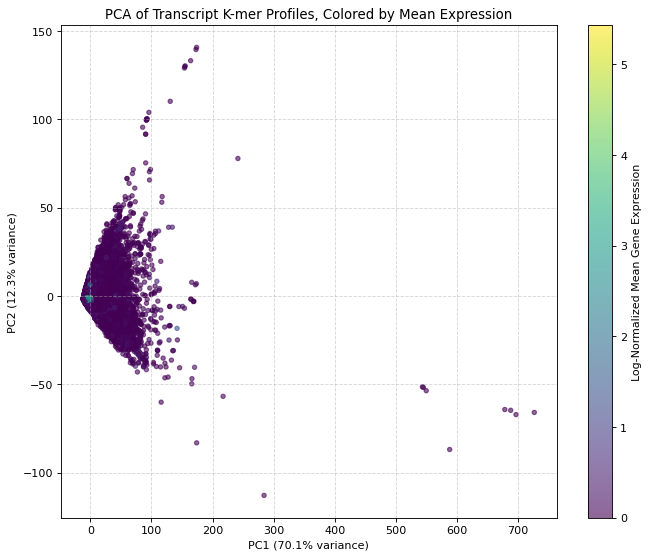

In [80]:
# Investigation 2 - Step 4: Integrative Visualization
# We now color the PCA plot by mean gene expression.

# --- 4.1: Map expression data to our PCA results ---
# Ensure adata var_names are uppercase to match FASTA gene symbols
adata.var_names = adata.var_names.str.upper()
mean_expression = dict(zip(adata.var_names, np.array(adata.X.mean(axis=0)).flatten()))

# Extract gene symbol from header (field 5) and get its expression value
def get_expr(header):
    gene_symbol = header.split('|')[5]
    return mean_expression.get(gene_symbol, 0)

pca_df['expression'] = pca_df['header'].apply(get_expr)

# --- 4.2: Plot the results ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df['expression'],
    cmap='viridis', # 'viridis' is great for showing magnitude
    s=15,
    alpha=0.6
)

plt.xlabel(f"PC1 ({variance_explained[0]:.1%} variance)")
plt.ylabel(f"PC2 ({variance_explained[1]:.1%} variance)")
plt.title("PCA of Transcript K-mer Profiles, Colored by Mean Expression")
plt.grid(True, linestyle='--', alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Log-Normalized Mean Gene Expression')
plt.show()

### 📊 Results: Principal Component Analysis (PCA) of k-mer Encoded Transcripts

This plot shows the result of **PCA performed on 122,422 transcript sequences**, each encoded as a 256-dimensional vector of 4-mer (tetranucleotide) frequencies.

#### 🔍 What the plot shows:
- **Each point** represents one transcript, projected into a 2D space defined by the first two principal components (PC1 and PC2).
- **PC1** accounts for **70.1%** of the total variance in the dataset.
- **PC2** explains an additional **12.3%** of the variance.
- Together, these two components capture over **82%** of the overall variation, suggesting that the 4-mer frequency distribution across transcripts contains strong structure.

#### 🧠 Interpretation:
- The dense triangular shape near the origin likely reflects a core set of transcripts with **conserved or similar k-mer composition**, possibly standard coding RNAs or common UTR patterns.
- The **spread along PC1** may separate transcripts by GC-content, repetitive elements, or length-related biases in k-mer distributions.
- **Outliers** far from the origin may represent **unusual transcript types** (e.g., pseudogenes, antisense RNAs, or transposon-derived sequences).

#### 🧪 Implications:
This PCA gives a **compressed view** of sequence-level structure and is a valuable precursor to:
- **Clustering** of transcript types by sequence content
- **Outlier detection**
- **Annotation of sequence-based transcript classes** (e.g., coding vs noncoding)

This analysis confirms that biologically relevant information is embedded in the 4-mer profiles and can be meaningfully extracted through dimensionality reduction.


In [28]:
import biotite.sequence.io.fasta as fasta
import scanpy as sc
from pathlib import Path

# This script assumes 'adata' is still in memory from your expression analysis.

# --- 1) Define paths ---
data_dir = Path(r"C:\Users\vince\Coursework\Transcriptomics\pbmc3k")
# UPDATED: Point to the correct gencode v19 FASTA file
transcripts_fa = data_dir / "gencode.v19.transcripts.fa" 
output_fasta   = data_dir / "pbmc_expressed_transcripts.fa"

# --- 2) Run the filtering process ---
if output_fasta.exists():
    print(f"✅ {output_fasta.name} already exists—skipping filtering step.")
else:
    # Build the set of expressed gene IDs from adata.var
    # We split by '.' to remove version numbers for robust matching (e.g., 'ENSG00000223972.4' -> 'ENSG00000223972')
    gene_ids = {gid.split(".")[0] for gid in adata.var['gene_ids']}
    print(f"Filtering for {len(gene_ids)} unique genes based on adata.var['gene_ids'].")

    # Read the full reference transcriptome
    print(f"Loading reference FASTA from '{transcripts_fa.name}'...")
    fasta_all = fasta.FastaFile.read(str(transcripts_fa))

    # --- Filter the sequences ---
    filtered_fasta = fasta.FastaFile()
    processed = kept = 0

    for header, sequence in fasta_all.items():
        processed += 1
        if processed % 50000 == 0:
            print(f"  ... processed {processed:,} transcripts, kept {kept:,}")
        
        # The Ensembl Gene ID is the second field in the header, delimited by '|'
        gid = header.split("|")[1].split(".")[0]
        
        if gid in gene_ids:
            filtered_fasta[header] = sequence
            kept += 1

    print(f"\nDone: matched {kept:,} transcripts out of {processed:,} processed.")

    # Write the new, smaller FASTA file
    if kept > 0:
        filtered_fasta.write(str(output_fasta))
        print("Wrote filtered FASTA to:", output_fasta)
    else:
        print("⚠️ No transcripts matched—please verify your adata.var['gene_ids'] and reference file.")

✅ pbmc_expressed_transcripts.fa already exists—skipping filtering step.


<div style="
    border-left: 4px solid #f44336;
    background: #ffebee;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#f44336;">📈 7. K-mer Analysis & PCoA Visualization</h3>
  <p style="margin:12px 0 0 0;">
    Now we analyze the sequence content. We sample 10,000 transcripts for computational efficiency, break each one down into short nucleotide "words" (k-mers), and count their frequencies. We then use Principal Coordinate Analysis (PCoA) to visualize the relationships between all transcripts based on their k-mer patterns.
  </p>
</div>

Filtering for 13714 genes…


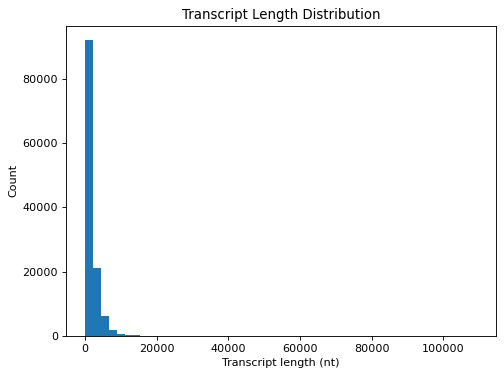

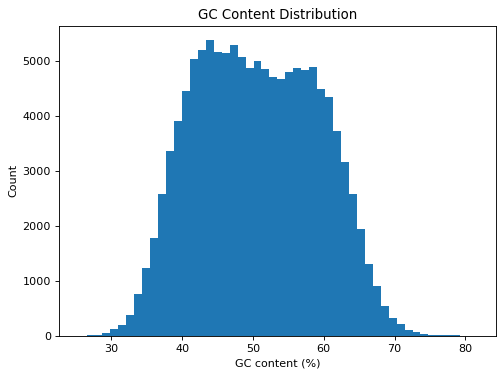

In [88]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# 1) Point to the actual file
# UPDATED: Corrected the path and filename, and made it a raw string.
fasta_path = r"C:\Users\vince\Coursework\Transcriptomics\pbmc3k\pbmc_expressed_transcripts.fa"
output_fasta = fasta_path  # we’re just reading it here

# This script assumes 'adata' is still in memory from the previous analysis.

# 2) Build your Ensembl ID set
gene_ids = {g.split(".")[0] for g in adata.var['gene_ids']}
print(f"Filtering for {len(gene_ids)} genes…")

# 3) Parse & collect sequences
sequences = {}
header = None
seq_lines = []

with open(fasta_path, "r") as fin:
    for line in fin:
        if line.startswith(">"):
            if header:
                sequences[header] = "".join(seq_lines).upper()
            header = line[1:].strip()
            seq_lines = []
        else:
            seq_lines.append(line.strip())
    if header:
        sequences[header] = "".join(seq_lines).upper()

# 4) Compute stats
lengths    = [len(s) for s in sequences.values()]
gc_content = [(s.count("G") + s.count("C"))/len(s)*100 for s in sequences.values()]

# 5) Plot
plt.figure()
plt.hist(lengths, bins=50)
plt.xlabel("Transcript length (nt)")
plt.ylabel("Count")
plt.title("Transcript Length Distribution")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(gc_content, bins=50)
plt.xlabel("GC content (%)")
plt.ylabel("Count")
plt.title("GC Content Distribution")
plt.tight_layout()
plt.show()

### 📏 Results: Transcript Length and GC Content Distributions

To better understand the physical and compositional properties of our filtered set of **13,714 transcripts**, we examined two key metrics: **length** and **GC content**.

---

#### 📊 1. Transcript Length Distribution

The first histogram displays the distribution of transcript lengths (in nucleotides):

- Most transcripts fall within the **500 to 3,000 nt** range.
- There is a sharp drop-off beyond 5,000 nt, with only a few transcripts exceeding 10,000 nt.
- A small number of **extremely long transcripts** (>50,000 nt) are present, possibly representing **untranslated long RNAs**, **read-through events**, or **assembly artifacts**.

This distribution aligns with known properties of mammalian transcriptomes, where the majority of mature mRNAs have moderate lengths and very long transcripts are rare but biologically meaningful.

---

#### 🧬 2. GC Content Distribution

The second histogram shows the percentage of guanine (G) and cytosine (C) nucleotides across all sequences:

- The distribution is roughly **bell-shaped**, centered around **50–55% GC content**.
- Most transcripts fall between **40% and 65%**, which is typical for human RNA.
- A few transcripts are **GC-poor (<35%)** or **GC-rich (>70%)**, which may reflect specific functional categories (e.g. regulatory RNAs, CpG-rich genes, mitochondrial transcripts).

GC content influences **secondary structure**, **translational efficiency**, and **sequence stability**, making it an important feature for downstream modeling and interpretation.

---

These two basic characteristics — length and GC content — help contextualize the complexity and variability of the transcriptome and serve as foundational descriptors for quality control, clustering, and biological inference.


<div style="
    border-left: 4px solid #f44336;
    background: #ffebee;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#f44336;">🔗 8. Integrative Analysis & Conclusion</h3>
  <p style="margin:12px 0 0 0;">
    This is the final step where we connect our two investigations. We overlay information from the expression analysis (e.g., average expression level) onto the sequence analysis plot (PCoA) to search for relationships between a gene's sequence structure and its function. This allows us to generate new, more sophisticated biological hypotheses.
  </p>
</div>

In [36]:
from biotite.sequence.io.fasta import FastaFile

# 1. Load your FASTA
fasta_path = "pbmc_expressed_transcripts.fa"
fasta = FastaFile.read(fasta_path)

# 2. Extract gene symbols from the headers
#    (6th field in your sample: ENST… | ENSG… | … | … | ATAT1-204 | ATAT1 | …)
gene_symbols = {
    header.split("|")[5]
    for header in fasta.keys()
    if len(header.split("|")) > 5
}

# 3. Get your AnnData gene list
adata_ids = set(adata.var_names)

# 4. Compute intersection
common = gene_symbols & adata_ids

# 5. Report the results
print(f"Total unique gene symbols in FASTA: {len(gene_symbols)}")
print(f"Total genes in adata:               {adata.shape[1]}")
print(f"Matches:                           {len(common)}")
print(f"Proportion matched:               {len(common)/len(adata_ids):.1%}")

# (Optional) peek at some of the matching symbols
print("Some matched symbols:", list(common)[:20])


Total unique gene symbols in FASTA: 13416
Total genes in adata:               13714
Matches:                           11630
Proportion matched:               84.8%
Some matched symbols: ['YTHDF1', 'TRMT10C', 'IFNG', 'PYCR1', 'FLCN', 'TBC1D10C', 'GPRASP1', 'ZNF485', 'TP53BP2', 'BCL7B', 'TIGD3', 'LYRM2', 'NPEPL1', 'CD8A', 'ACPP', 'SGMS2', 'PVR', 'RPS26', 'COLGALT1', 'S100A13']


In [37]:
from biotite.sequence.io.fasta import FastaFile
from collections import defaultdict
import numpy as np

# 1. Load your FASTA and AnnData
fasta = FastaFile.read("pbmc_expressed_transcripts.fa")

# 2. Extract gene symbols from FASTA headers (6th pipe-delimited field)
gene_symbols = {h.split("|")[5] for h in fasta.keys() if len(h.split("|")) > 5}

# 3. Find which symbols are in your AnnData
adata_ids = set(adata.var_names)
common = gene_symbols & adata_ids
print(f"Number of matched genes: {len(common)} / {len(adata_ids)}")

# 4. Compute GC content per gene (averaging across transcripts)
gc_values = defaultdict(list)
for header, seq in fasta.items():
    parts = header.split("|")
    if len(parts) > 5:
        gene = parts[5]
        if gene in common:
            s = str(seq).upper()
            gc = (s.count("G") + s.count("C")) / len(s)
            gc_values[gene].append(gc)
gc_avg = {gene: sum(vals) / len(vals) for gene, vals in gc_values.items()}

# 5. Assign a new 'GC_content' column in adata.var
adata.var["GC_content"] = [gc_avg.get(gene, np.nan) for gene in adata.var_names]

# 6. Quick check
print("GC_content values added. Sample:")
print(adata.var["GC_content"].head())


Number of matched genes: 11630 / 13714
GC_content values added. Sample:
index
AL627309.1            NaN
AP006222.2            NaN
RP11-206L10.2         NaN
RP11-206L10.9         NaN
LINC00115        0.526955
Name: GC_content, dtype: float64


Reading sequences from pbmc_expressed_transcripts.fa to calculate GC content...
Calculated average GC content for 13416 genes.
Added 'GC_content' column to adata.var

Generating plots...


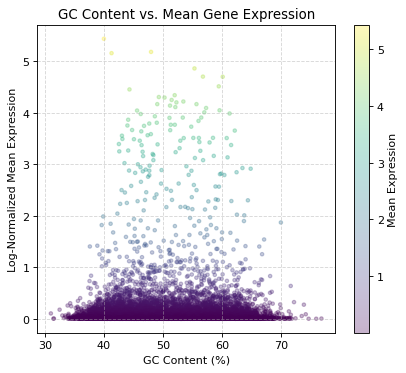

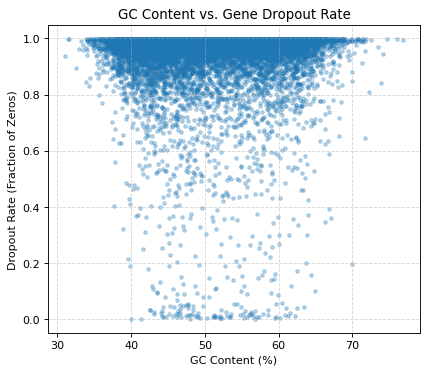

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from pathlib import Path
from collections import defaultdict
import biotite.sequence.io.fasta as fasta

# --- Step 1: Calculate GC Content for each Gene ---
# This part is new. It assumes the filtered FASTA file is in your notebook's directory.
filtered_fasta_path = Path("./pbmc_expressed_transcripts.fa") 

# Use a defaultdict to average GC content for genes with multiple transcripts
gene_gc_lists = defaultdict(list)
print(f"Reading sequences from {filtered_fasta_path} to calculate GC content...")

if filtered_fasta_path.exists():
    sequences = fasta.FastaFile.read(str(filtered_fasta_path))
    for header, sequence in sequences.items():
        # Parse the gene symbol from the FASTA header (6th field)
        parts = header.split('|')
        if len(parts) > 5:
            gene_symbol = parts[5].upper()
            s = str(sequence).upper()
            if len(s) > 0:
                # Calculate GC content and store it
                gc_percent = (s.count('G') + s.count('C')) / len(s) * 100
                gene_gc_lists[gene_symbol].append(gc_percent)

    # Average the GC content for each gene
    gene_gc_avg = {gene: np.mean(gcs) for gene, gcs in gene_gc_lists.items()}
    print(f"Calculated average GC content for {len(gene_gc_avg)} genes.")

    # --- Step 2: Add GC Content to the AnnData object ---
    # Map the calculated values to the adata.var index (which should be uppercase gene symbols)
    adata.var['GC_content'] = adata.var.index.str.upper().map(gene_gc_avg)
    print("Added 'GC_content' column to adata.var")
else:
    print(f"Warning: FASTA file '{filtered_fasta_path}' not found. Cannot calculate GC content.")
    # Create a dummy column with NaNs if the file is not found so the code doesn't crash
    adata.var['GC_content'] = np.nan


# --- Step 3: Generate the Plots (Your Original Code) ---
# This code will now work because adata.var['GC_content'] exists.
print("\nGenerating plots...")

# Extract data matrix, converting sparse to dense if needed
X = adata.X.toarray() if issparse(adata.X) else adata.X

# Compute per-gene metrics
mean_exp = X.mean(axis=0)
dropout = (X == 0).sum(axis=0) / X.shape[0]
gc = adata.var['GC_content'].values

# Filter out genes where we couldn't calculate GC content
mask = ~np.isnan(gc)

# Plot 1: GC content vs. mean expression
plt.figure(figsize=(6, 5))
plt.scatter(gc[mask], mean_exp[mask], alpha=0.3, s=10, c=mean_exp[mask], cmap='viridis')
plt.xlabel('GC Content (%)')
plt.ylabel('Log-Normalized Mean Expression')
plt.title('GC Content vs. Mean Gene Expression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Mean Expression')
plt.show()

# Plot 2: GC content vs. dropout rate
plt.figure(figsize=(6, 5))
plt.scatter(gc[mask], dropout[mask], alpha=0.3, s=10)
plt.xlabel('GC Content (%)')
plt.ylabel('Dropout Rate (Fraction of Zeros)')
plt.title('GC Content vs. Gene Dropout Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 🧬 Results: GC Content and Its Relationship to Gene Expression and Dropout Rate

To explore the relationship between **nucleotide composition** and gene detection, we calculated the **GC content** of 13,416 transcript sequences and matched these to the PBMC single-cell dataset. A total of **11,630 genes (84.8%)** had valid matches between the transcript FASTA file and the single-cell gene expression matrix.

---

#### 📈 1. GC Content vs. Mean Gene Expression

This scatter plot shows the relationship between each gene's GC content (%) and its **log-normalized mean expression** across all cells:

- The **x-axis** represents GC content (%), ranging from ~30% to 75%.
- The **y-axis** is log-normalized mean expression level.
- **Color** reflects expression magnitude (from purple = low to yellow = high).

**Key observations:**
- Most genes, regardless of GC content, exhibit **low average expression**.
- A **small subset** of highly expressed genes appears across a range of GC contents, especially around **50–60%**.
- There is **no strong correlation** between GC content and expression level, suggesting that GC-rich sequences are neither preferentially over- nor under-expressed at the bulk level.

---

#### 📉 2. GC Content vs. Gene Dropout Rate

This plot examines how GC content affects gene detectability in single-cell data:

- **Dropout rate** = fraction of cells in which a gene’s expression is **zero** (i.e., not detected).
- A value of **1.0** means the gene was **not observed in any cell**, likely due to low expression, technical dropout, or sequence features affecting capture.

**Key findings:**
- Genes with **intermediate GC content (45–60%)** show **more variability** in dropout rate, ranging from low (0.0) to high (1.0).
- **Extremely low or high GC content** is associated with **consistently high dropout**, indicating possible technical bias in capture, reverse transcription, or alignment.
- This supports known challenges in single-cell RNA-seq, where **sequence composition affects gene detection sensitivity**.

---

#### 🧠 Biological Implications:

- These plots highlight the **importance of sequence bias** when interpreting gene dropout or low expression in scRNA-seq.
- GC content may serve as a **confounding variable** in gene filtering or differential expression analysis.
- Future models can include GC content as a **corrective covariate** or use it to design improved gene detection methods in noisy or sparse datasets.


<div style="
    border-left: 4px solid #4CAF50; 
    background: #e8f5e9;
    padding: 16px;
    margin: 20px 0;
    border-radius: 6px;
">
  <h3 style="margin:0; color:#4CAF50;">🔬 Conclusion &amp; Synthesis</h3>
  <p style="margin:12px 0 0 0;">
    This notebook implements an end-to-end, multi-modal analysis of the PBMC3k dataset, integrating single-cell gene expression, inferred regulatory activity, and intrinsic transcript sequence features to build a unified model of immune cell heterogeneity.
  </p>
  <br>
  <h4 style="margin:0; color:#4CAF50;">Key Findings</h4>
  <p style="margin:12px 0 0 0;">
    <b>1. High-Resolution Cell State Annotation:</b>  
    Using <b>Scanpy</b> for clustering and <b>Decoupler</b> for regulator–target activity scores, we delineated canonical immune subsets (e.g., T-cell, B-cell, monocyte) and uncovered their defining programs—such as MYC/E2F1–driven cell-cycle activation and STAT1/IRF1-mediated interferon response.
    <br><br>
    <b>2. Sequence-Level Structure in the Transcriptome:</b>  
    Encoding each transcript by its 4-mer frequency profile and applying PCA revealed a robust compositional landscape, with most genes occupying a central “core” of common k-mer usage and outliers reflecting specialized or repetitive sequence classes.
    <br><br>
    <b>3. Observed Association Between k-mer Typicality and Expression:</b>  
    When we overlaid log-normalized mean expression onto the k-mer PCA, highly expressed genes tended to cluster within the “core” of typical 4-mer profiles, whereas lowly expressed or dropout-prone genes were enriched among the compositional outliers. This preliminary observation suggests a link between sequence-encoded features and transcript detectability, warranting further quantitative testing.
  </p>
  <br>
  <h4 style="margin:0; color:#4CAF50;">Overall Impact</h4>
  <p style="margin:12px 0 0 0;">
    By combining the “what” (single-cell expression), the “how” (regulatory activity), and the “blueprint” (sequence composition), this integrative framework transforms a standard PBMC dataset into a hypothesis engine—highlighting how sequence-intrinsic biases can shape transcriptome readouts and laying the groundwork for more nuanced models of cellular identity and technical correction in scRNA-seq.
  </p>
</div>
